# Sentiment Analysis of Restaurant Reviews

[Source link](https://github.com/anujvyas/Natural-Language-Processing-Projects/tree/master/Sentiment%20Analysis%20-%20Restaurant%20Reviews)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
# More about quoting parameter:
# - QUOTE_MINIMAL (0)
# - QUOTE_ALL (1)
# - QUOTE_NONNUMERIC (2)
# - QUOTE_NONE (3)
dataset = pd.read_csv("data/Restaurant_Reviews.tsv", delimiter="\t", quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


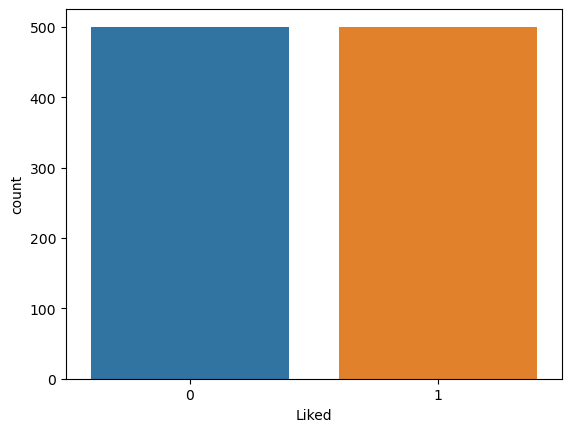

In [3]:
sns.countplot(dataset, x="Liked");

## Data Preprocessing

In [4]:
# A stemming algorithm is a linguistic normalization process in which
# the variant forms of a word are reduced to a standard form.
import re
import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = set(stopwords.words("english"))
stop_words.remove("not")
ps = PorterStemmer()
reviews = dataset["Review"]

In [5]:
corpus = []
for review in reviews:
    # Cleaning special character from the reviews
    review = re.sub("[^a-zA-Z]", " ", review)
    # Converting the entire review into lower case
    review = review.lower()
    # Tokenizing the review by words
    review = review.split()
    # Removing the stop words and stemming
    review = [ps.stem(word) for word in review if not word in stop_words]
    # Joining the stemmed words
    review = " ".join(review)
    corpus.append(review)

In [6]:
corpus[0:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

## Creating the Bag of Words model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")
print(f"First five rows of X:\n{X[:5]}")

X (1000, 1500)
y (1000,)
First five rows of X:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Splitting the dataset into the train and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(f"Train shapes : X = {X_train.shape}, y = {y_train.shape}")
print(f"Test  shapes : X = {X_test.shape},  y = {y_test.shape}")

Train shapes : X = (800, 1500), y = (800,)
Test  shapes : X = (200, 1500),  y = (200,)


### Training the Multinomial Naive Bayes classifier

In [9]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        97
           1       0.78      0.79      0.78       103

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200



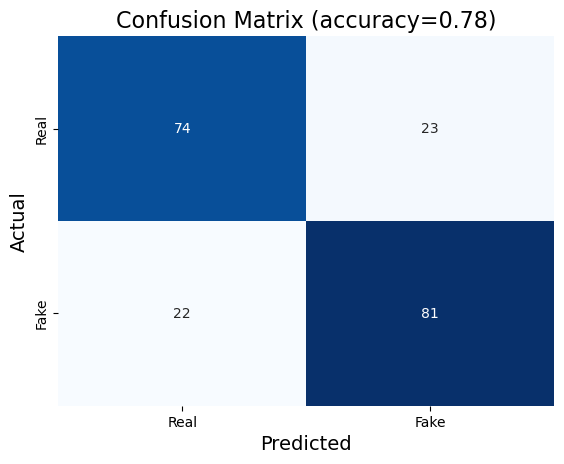

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_nb = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(
    cm, annot=True, cmap="Blues", cbar=False, fmt="d", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"]
)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## Live Prediction

In [11]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern="[^a-zA-Z]",repl=" ", string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in stop_words]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = " ".join(final_review)

    temp = cv.transform([final_review]).toarray()
    result = classifier.predict(temp)
    if result:
        print("Prediction: This is a POSITIVE review!")
    else:
        print("Prediction: This is a NEGATIVE review!")

    return result

In [12]:
test_reviews = [
    "The food is really good here.",
    "Food was pretty bad and the service was very slow.",
    "The food was absolutely wonderful, from preparation to presentation, very pleasing.",
]

In [13]:
for test_review in test_reviews:
    print(f"Review: {test_review}")
    predict_sentiment(test_review)
    print()

Review: The food is really good here.
Prediction: This is a POSITIVE review!

Review: Food was pretty bad and the service was very slow.
Prediction: This is a NEGATIVE review!

Review: The food was absolutely wonderful, from preparation to presentation, very pleasing.
Prediction: This is a POSITIVE review!

